First, let's import the clean data:

In [1]:
import pandas as pd

# Read data 
df = pd.read_csv('data_train.csv', header=0)

# print(X.head())

Second, let's do some Exploratory data analysis：

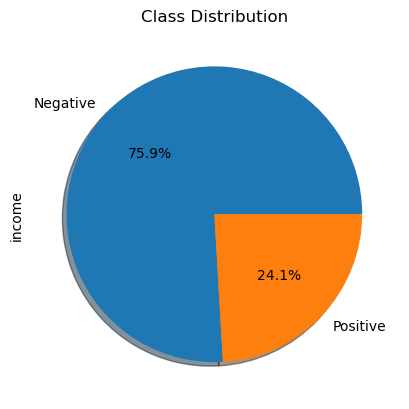

In [2]:
import matplotlib.pyplot as plt

# Using pie charts to count the number and proportion of positive and negative samples
count = df.iloc[:,-1].value_counts()

count.plot(kind='pie', labels=['Negative', 'Positive'], autopct='%1.1f%%', shadow=True)
plt.title('Class Distribution')
plt.show()

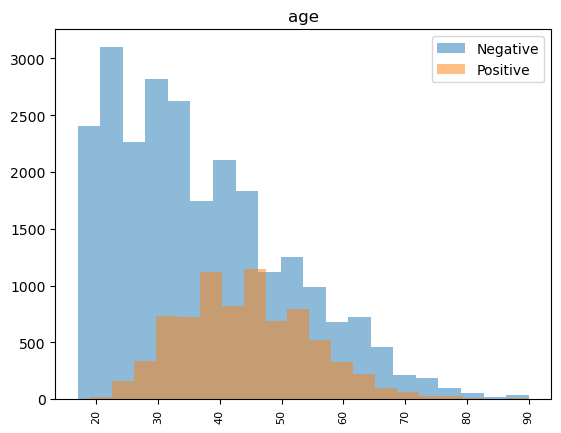

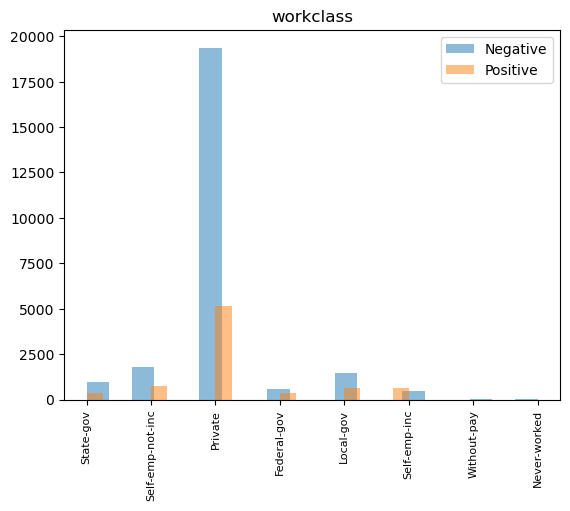

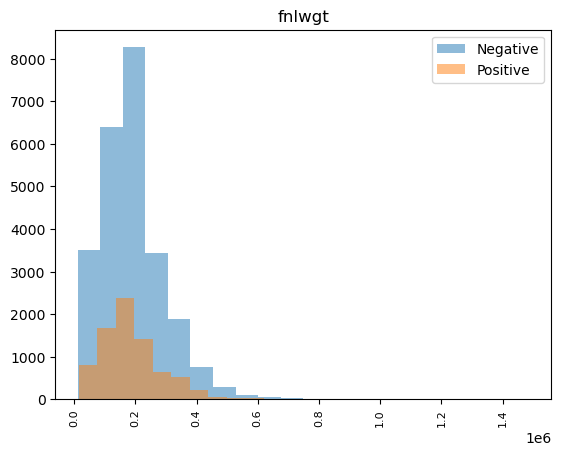

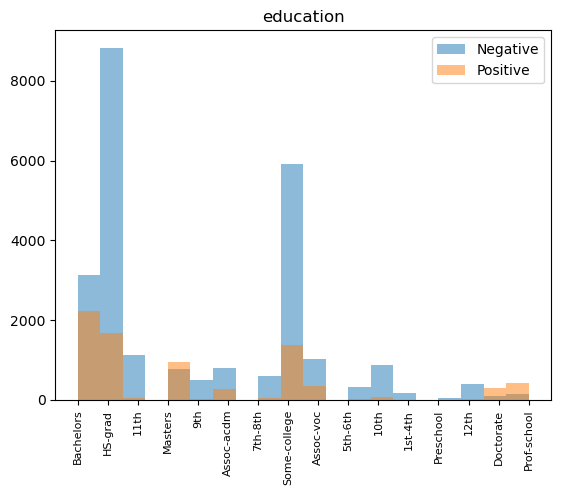

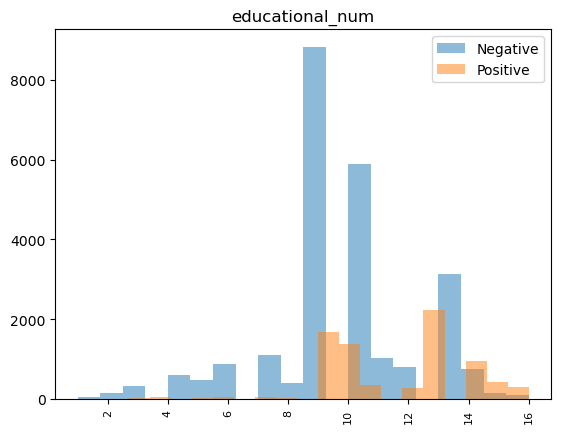

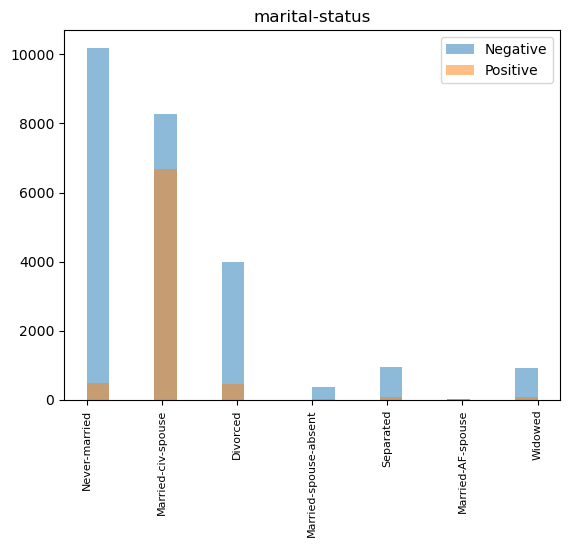

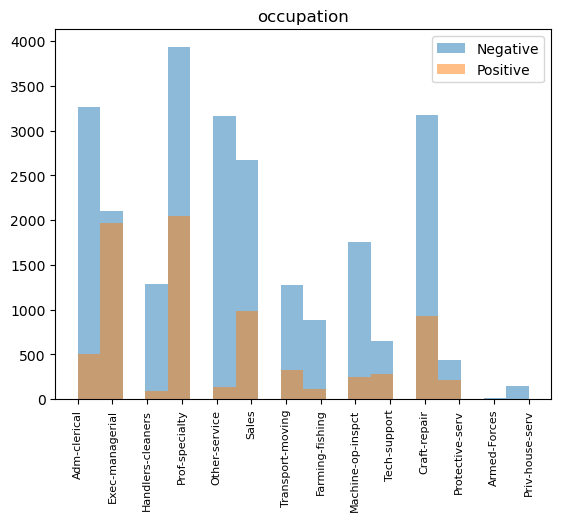

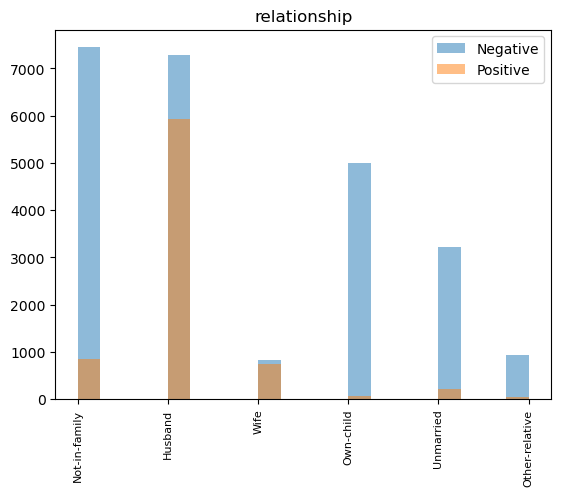

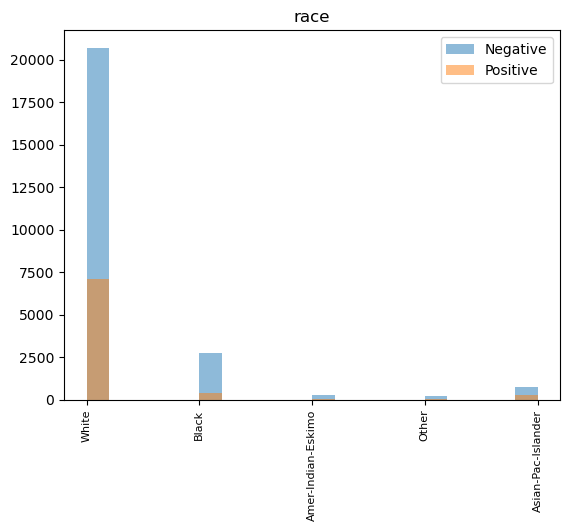

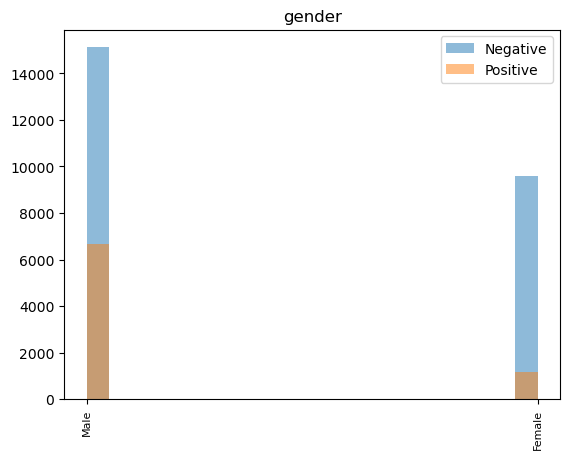

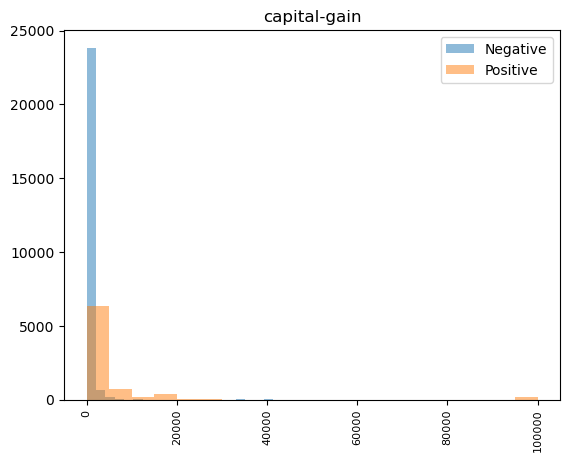

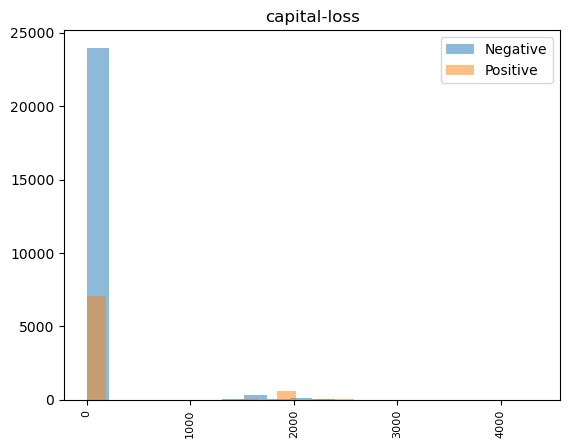

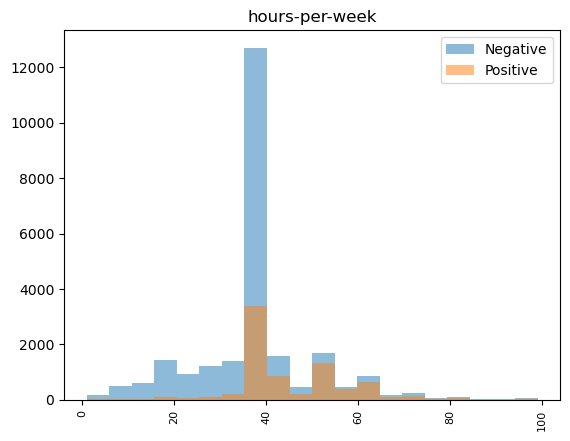

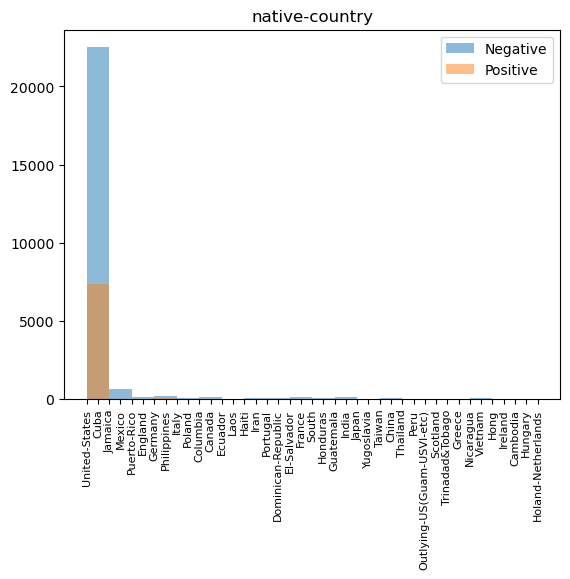

In [3]:
# Plot the histogram of each feature：
for feature in df.columns:
    if feature == 'income':
        continue
    plt.hist(df[df['income'] == 0][feature], bins=20, alpha=0.5, label='Negative')
    plt.hist(df[df['income'] == 1][feature], bins=20,alpha=0.5, label='Positive')
    plt.legend(loc='upper right')
    plt.title(feature)
    plt.xticks(rotation=90, fontsize=8)
    plt.show()


C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_26096\2172967636.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


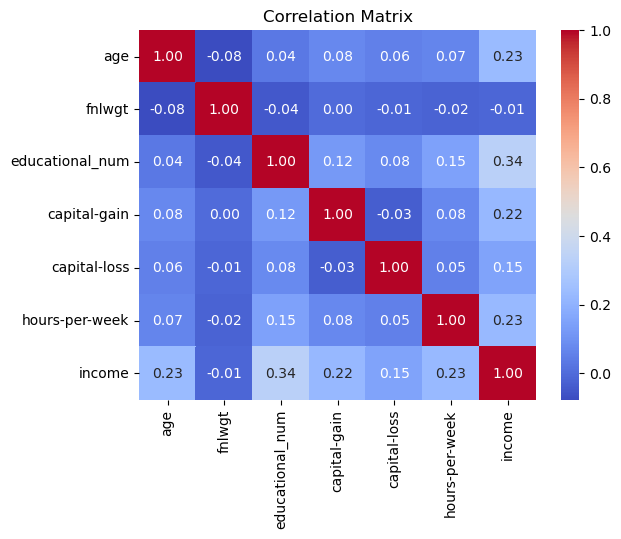

In [4]:
import seaborn as sns

# Calculate the correlation coefficient and plot the heat map
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

At the end of the exploratory data analysis, we have become familiar with the basic characteristics of the data. Next, we can start training the model.
Before training the model a data type conversion is required to encode string type variables into numeric variables, which is done by the LabelEncoder function of the sklearn package.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
encoder = LabelEncoder()

for col in df:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col].astype(str))

df

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


After the encoding is complete, the “fnlwgt” columns need to be feature scaled so that the columns are of essentially the same order of magnitude. The min-max scaling method is used here

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Feature scaling
for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

df.head()

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.857143,0.044302,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.95,0.0
1,0.452055,0.714286,0.048238,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.95,0.0
2,0.287671,0.428571,0.138113,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95,0.0
3,0.493151,0.428571,0.151068,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.95,0.0
4,0.150685,0.428571,0.221488,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.10,0.0


In [7]:
# Use the first 80% of the dataset as the training dataset and the last 20% as the valid dataset
split_idx = int(len(df) * 0.8)

df_train = df[:split_idx]
df_valid = df[split_idx:]

After data pre-processing, the model is trained using L1 regularization to find the best subset of features for the model:

In [8]:

from sklearn.linear_model import LogisticRegression

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1] 

# Instantiate the classifier and set the corresponding hyperparameters
clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=0)

# Train the model using L1 regularization and select the best subset of features
clf.fit(X_train, y_train)


# Print the column names of the best feature subset
best_features = []
for i in range(len(X_train.columns)):
    if clf.coef_[0, i] != 0:
        best_features.append(X_train.columns[i]) 

print(best_features)


['age', 'workclass', 'education', 'educational_num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']


It can be seen that the best feature subset original feature subset is consistent. So the original data can be directly used to train the model.
Next, the test set is imported and the same data transformation and feature scaling are performed to start preparing the training model

In [9]:
df_test = pd.read_csv('data_test.csv', header=0)

# feature transformation
for col in df_test:
    if df_test[col].dtype == 'object':
        df_test[col] = encoder.fit_transform(df_test[col].astype(str))

# feature scaled
for col in df_test.columns:
    df_test[col] = scaler.fit_transform(df_test[[col]])

Training models using the keras framework:

In [10]:
from keras.models import Sequential
from keras.layers import Dense

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1] 
X_valid = df_valid.iloc[:, :-1]
y_valid = df_valid.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]


In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=1e-3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_valid, y_valid))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/20
407/407 [==============================] - 2s 3ms/step - loss: 0.4196 - accuracy: 0.8043 - val_loss: 0.4023 - val_accuracy: 0.8062
Epoch 2/20
407/407 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8346 - val_loss: 0.3357 - val_accuracy: 0.8415
Epoch 3/20
407/407 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8419 - val_loss: 0.3281 - val_accuracy: 0.8425
Epoch 4/20
407/407 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8436 - val_loss: 0.3307 - val_accuracy: 0.8491
Epoch 5/20
407/407 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8447 - val_loss: 0.3267 - val_accuracy: 0.8471
Epoch 6/20
407/407 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8448 - val_loss: 0.3251 - val_accuracy: 0.8491
Epoch 7/20
407/407 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8484 - val_loss: 0.3255 - val_accuracy: 0.8472
Epoch 

Evaluate models using precision, recall and F1 scores

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  

# print(y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(precision, recall, f1)

509/509 [==============================] - 1s 921us/step
0.7399435426958363 0.5452418096723869 0.6278443113772455


The keras model training is complete. Now to try the model in the pytorch framework and check if the accuracy will improve:

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# data type transformation:

# Convert a Pandas DataFrame to a NumPy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)


# Convert NumPy arrays to PyTorch Tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Convert NumPy arrays to PyTorch Tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_26096\3094142304.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_26096\3094142304.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_26096\3094142304.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_valid = torch.tensor(X_valid, dtype=torch.float32)
C:\Users\Xinyi Liu\AppData\Loca

In [14]:
# compile the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_features=X_train.shape[1], out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initialize the model and optimizer
net = Net()
optimizer = optim.Adagrad(net.parameters(), lr_decay=0.01)
criterion = nn.BCELoss()

In [15]:
# train model
num_epochs = 10
batch_size = 64

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, X_train.shape[0], batch_size):
        # Convert data into a tensor
        inputs = torch.Tensor(X_train[i:i+batch_size])
        labels = torch.Tensor(y_train[i:i+batch_size]).unsqueeze(1)

        # Forward propagation, computational loss and backward propagation
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Statistical losses
        running_loss += loss.item()

    # Validate on the validation dataset
    net.eval()
    with torch.no_grad():
        inputs = torch.Tensor(X_valid)
        labels = torch.Tensor(y_valid).unsqueeze(1)
        outputs = net(inputs)
        val_loss = criterion(outputs, labels)
        val_preds = outputs.round().squeeze().detach().numpy()
        val_labels = labels.squeeze().detach().numpy()
        val_accuracy = np.mean(val_preds == val_labels)
        val_precision = precision_score(val_labels, val_preds)
        val_recall = recall_score(val_labels, val_preds)
        val_f1 = f1_score(val_labels, val_preds)

    print(f'Epoch {epoch+1}, Training Loss: {running_loss / (X_train.shape[0] / batch_size):.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}, Validation F1-Score: {val_f1:.4f}')



Epoch 1, Training Loss: 0.4749, Validation Loss: 0.4492, Validation Accuracy: 0.7835, Validation Precision: 0.8770, Validation Recall: 0.1381, Validation F1-Score: 0.2387
Epoch 2, Training Loss: 0.4435, Validation Loss: 0.4388, Validation Accuracy: 0.7978, Validation Precision: 0.8314, Validation Recall: 0.2219, Validation F1-Score: 0.3503
Epoch 3, Training Loss: 0.4372, Validation Loss: 0.4342, Validation Accuracy: 0.7998, Validation Precision: 0.7984, Validation Recall: 0.2475, Validation F1-Score: 0.3779
Epoch 4, Training Loss: 0.4340, Validation Loss: 0.4316, Validation Accuracy: 0.8013, Validation Precision: 0.7844, Validation Recall: 0.2637, Validation F1-Score: 0.3948
Epoch 5, Training Loss: 0.4320, Validation Loss: 0.4298, Validation Accuracy: 0.8029, Validation Precision: 0.7832, Validation Recall: 0.2731, Validation F1-Score: 0.4050
Epoch 6, Training Loss: 0.4306, Validation Loss: 0.4285, Validation Accuracy: 0.8035, Validation Precision: 0.7768, Validation Recall: 0.2806, Va

calculate the Precision, Recall, F1-score as the indicates of model evaluation:

In [16]:
net.eval()
with torch.no_grad():
    inputs = torch.Tensor(X_test)
    print(y_test.shape)
    labels = torch.Tensor(y_test).unsqueeze(1)
    outputs = net(inputs)
    print(labels.shape, outputs.shape)
    labels = torch.round(labels)
    print(labels)
    test_loss = criterion(outputs, labels)
    test_preds = outputs.round().squeeze().detach().numpy()
    test_labels = labels.squeeze().detach().numpy()
    test_accuracy = np.mean(test_preds == test_labels)
    test_precision = precision_score(test_labels, test_preds)
    test_recall = recall_score(test_labels, test_preds)
    test_f1 = f1_score(test_labels, test_preds)
    
print('Precision: {:.4f}'.format(test_precision))
print('Recall: {:.4f}'.format(test_recall))
print('F1-score: {:.4f}'.format(test_f1))


torch.Size([16281])
torch.Size([16281, 1]) torch.Size([16281, 1])
tensor([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]])
Precision: 0.7396
Recall: 0.2910
F1-score: 0.4176


Comparing the keras model and the pytorch model, it is found that the keras model is relatively superior. So the keras model was derived for ensemble learning:

In [17]:
model

model.save('NeuralNetwork.h5')

When you want to import the model, load_model.() should be used:

In [18]:
from tensorflow import keras

loaded_model = keras.models.load_model('NeuralNetwork.h5')